<a href="https://colab.research.google.com/github/Nagasi77/PCVK-2025/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan:35


/tmp/ipython-input-1196350599.py:18: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


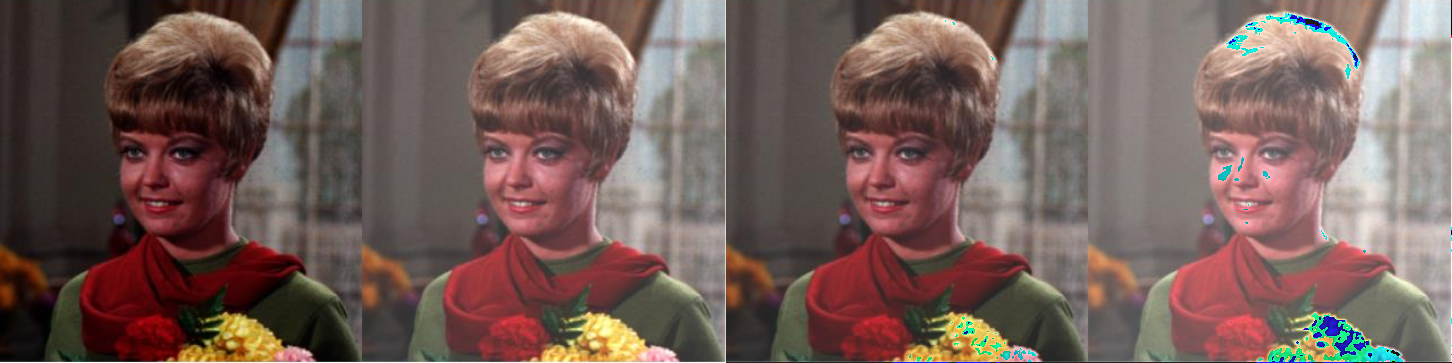

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/content/PCVK/img/female.png')
brightness_image = np.zeros(original.shape, original.dtype)
#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
#brightness_image cv.convertScaleAbs(original, beta-brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import math



In [5]:
# Load gambar
original = cv.imread('/content/drive/MyDrive/content/PCVK/img/Task1.png')


1. Invers Citra (kiri: asli, kanan: inverse)


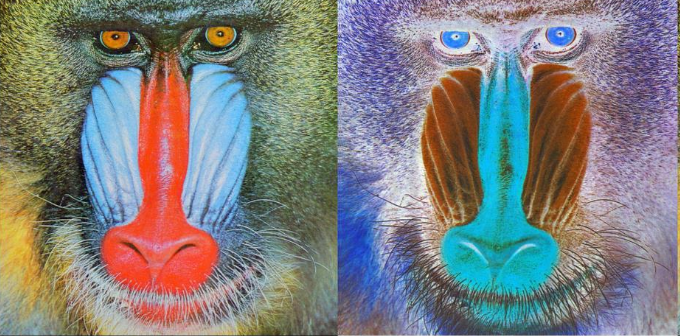

In [6]:
#1 inverse image
invers_image = 255 - original
inv_concat = cv.hconcat([original, invers_image])
print("1. Invers Citra (kiri: asli, kanan: inverse)")
cv2_imshow(inv_concat)

In [7]:
# Load gambar
original = cv.imread('/content/drive/MyDrive/content/PCVK/img/female.png')

2. Transformasi Kontras (kiri: asli, kanan: kontras)


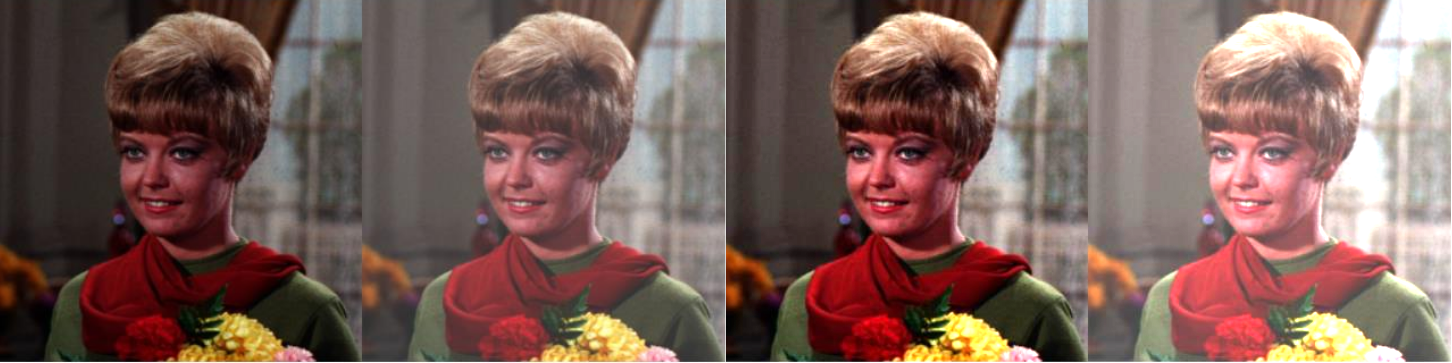

In [8]:
# 2. Transformasi Kontras
# ----------------------------
alpha = 1.5
kontras_image = cv.convertScaleAbs(original, alpha=alpha, beta=0)
kontrast_concat = cv.hconcat([original, kontras_image])
print("2. Transformasi Kontras (kiri: asli, kanan: kontras)")
cv2_imshow(kontrast_concat)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 55
Hasil Transformasi Log dengan nilai kecerahan 55


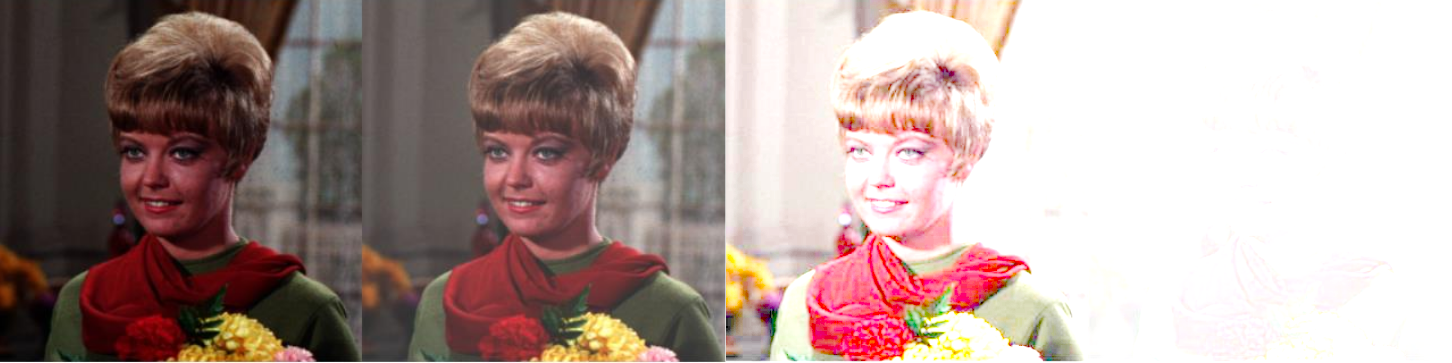

In [20]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

# Input
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 40   # default

original = cv.imread('/content/drive/MyDrive/content/PCVK/img/female.png')
# Transformasi Logaritmik
log_image = np.log1p(original.astype(np.float32))   # log(1 + r)
# Normalisasi
log_image = cv.normalize(log_image, None, 0, 255, cv.NORM_MINMAX)
log_image = np.array(log_image, dtype=np.uint8)

# Brightnesss
log_image = cv.convertScaleAbs(log_image, alpha=brightness/40.0, beta=0)

final_frame = cv.hconcat([original, log_image])

print(f"Hasil Transformasi Log dengan nilai kecerahan {brightness}")
cv2_imshow(final_frame)


In [22]:

original = cv.imread('/content/drive/MyDrive/content/PCVK/img/Task1.png')
import matplotlib.pyplot as plt


4a. Grayscale Averaging


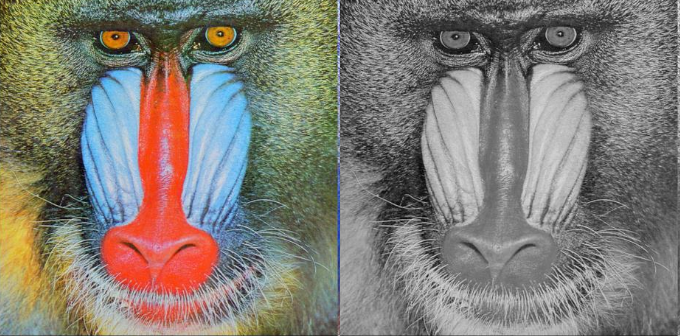

In [23]:
# Grayscale avg
gray_avg = np.mean(original, axis=2).astype(np.uint8)
print("4a. Grayscale Averaging")
cv2_imshow(cv.hconcat([original, cv.cvtColor(gray_avg, cv.COLOR_GRAY2BGR)]))


4b. Grayscale Lightness


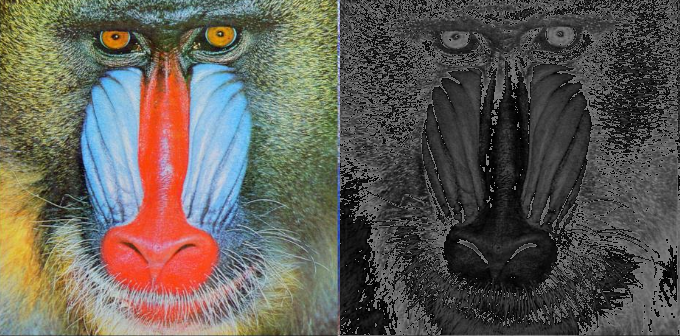

In [14]:
# Grayscale Lightness

gray_lightness = ((np.max(original, axis=2) + np.min(original, axis=2)) / 2).astype(np.uint8)
print("4b. Grayscale Lightness")
cv2_imshow(cv.hconcat([original, cv.cvtColor(gray_lightness, cv.COLOR_GRAY2BGR)]))

4c. Grayscale Luminance


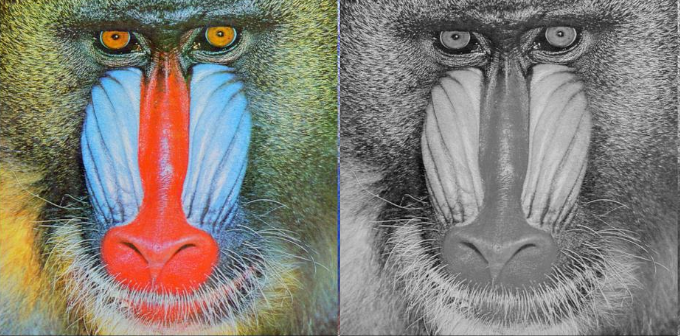

In [15]:
# Grayscale Luminance (NTSC)

gray_luminance = (0.299*original[:,:,2] + 0.587*original[:,:,1] + 0.114*original[:,:,0]).astype(np.uint8)
print("4c. Grayscale Luminance")
cv2_imshow(cv.hconcat([original, cv.cvtColor(gray_luminance, cv.COLOR_GRAY2BGR)]))

5. Tampilkan satu warna tertentu (Merah)


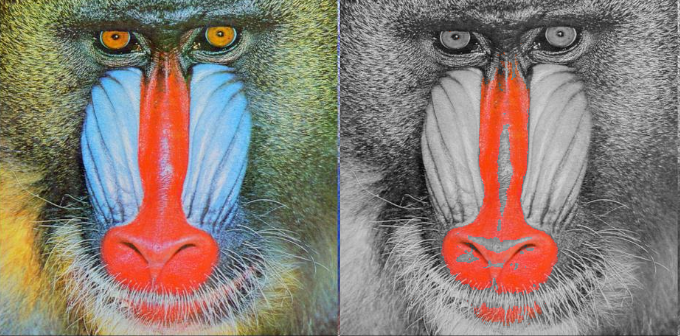

In [25]:
# 5. Tampilkan satu warna tertentu

# Konversi ke HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Define
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# mask for the red color
mask = cv.inRange(hsv, lower_red, upper_red)

# grayscale image from the original
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Combine
result = np.where(mask[:,:,None] != 0, original, gray_bgr)
final_frame = cv.hconcat([original, result])
print("5. Tampilkan satu warna tertentu (Merah)")
cv2_imshow(final_frame)